✅ Azure Standard Landing Zone 아키텍처 다이어그램이 생성되었습니다!
📁 파일명: azure_landing_zone_architecture.png
📊 다이어그램 파일이 성공적으로 생성되었습니다!
📏 파일 크기: 337860 bytes


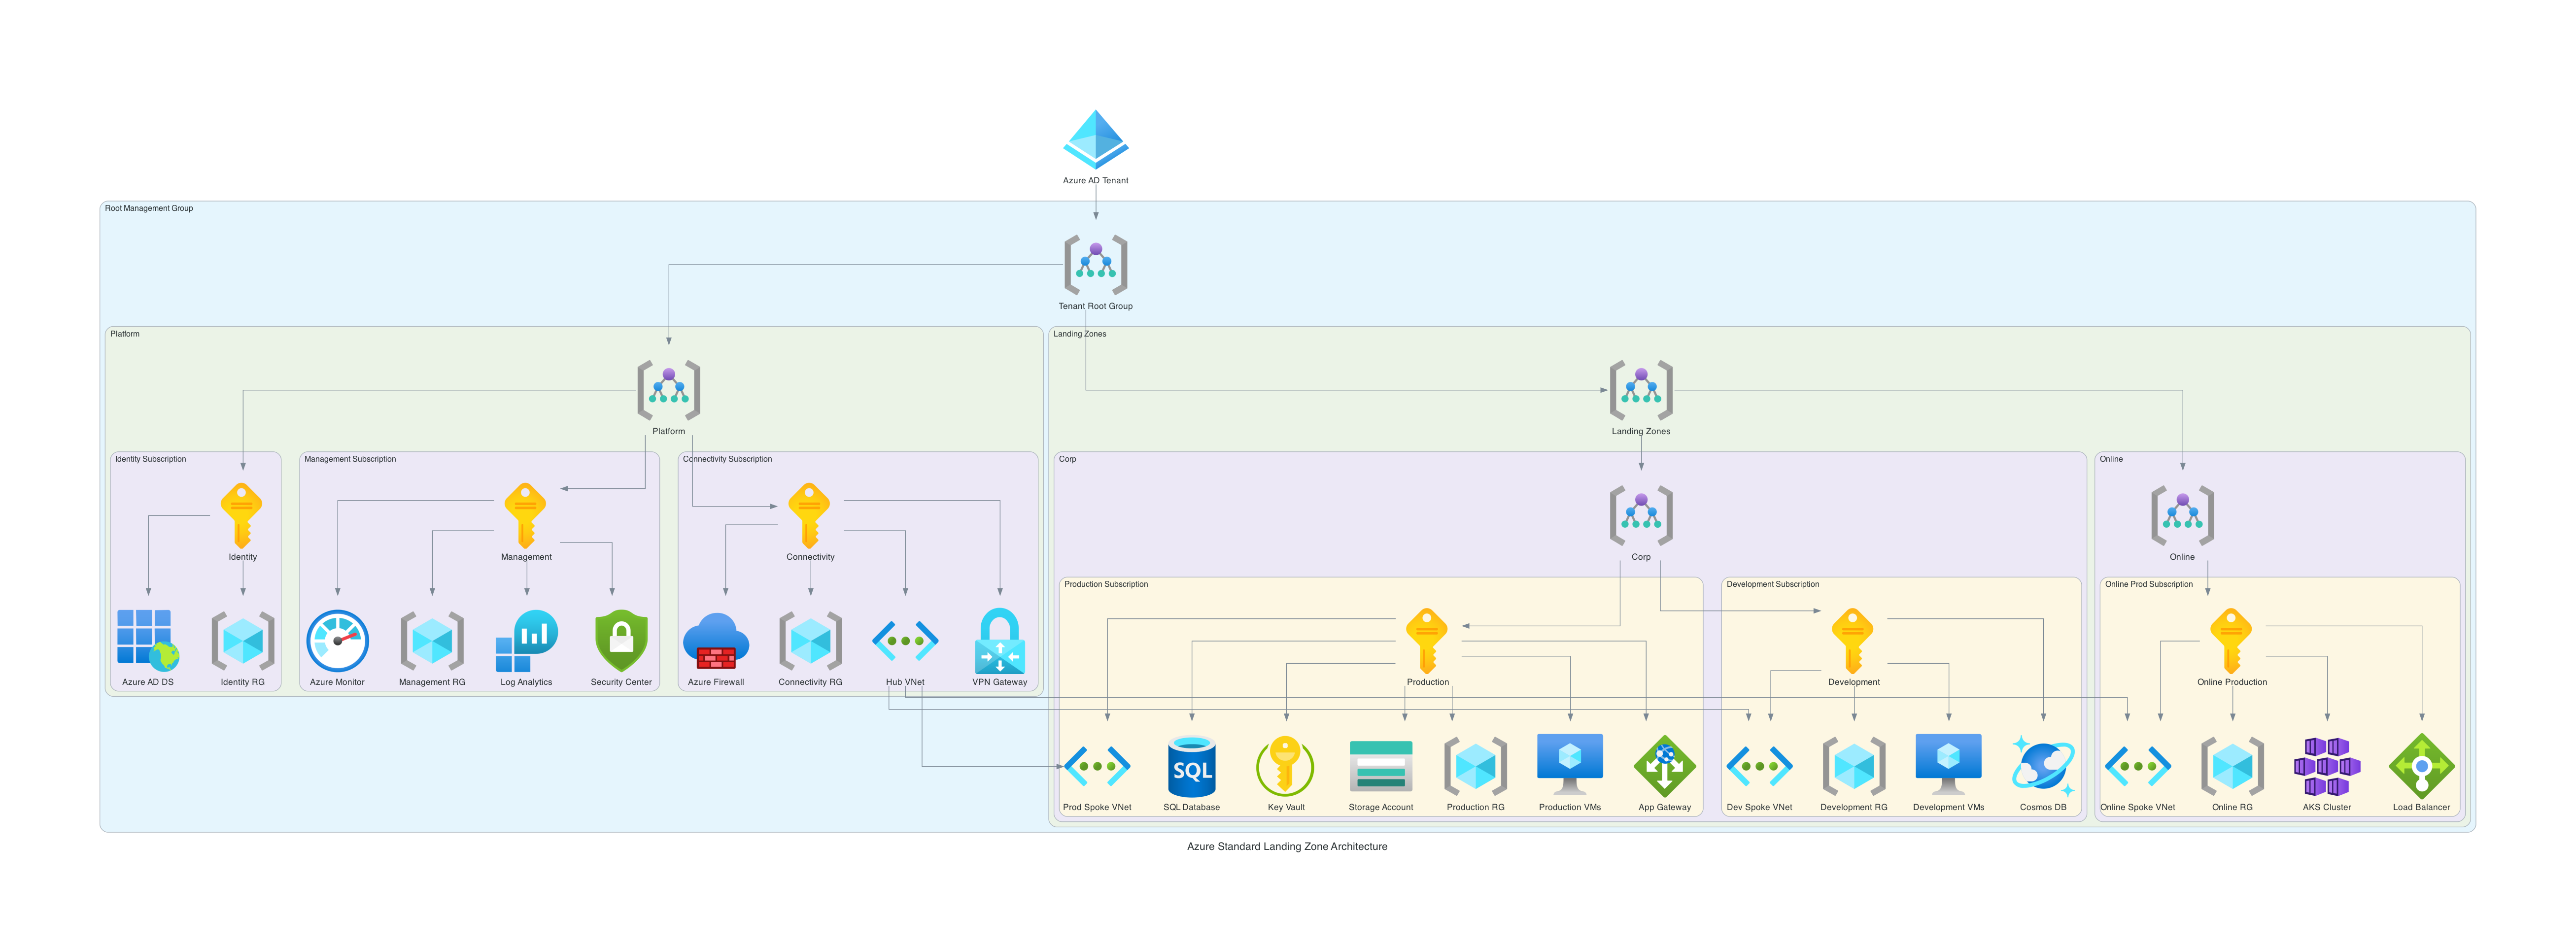

In [2]:
from diagrams import Cluster, Diagram
from diagrams.azure.general import Managementgroups, Subscriptions, Resourcegroups
from diagrams.azure.identity import ActiveDirectory, EnterpriseApplications
from diagrams.azure.network import VirtualNetworks, VirtualNetworkGateways, Firewall, ApplicationGateway, LoadBalancers
from diagrams.azure.compute import VM, KubernetesServices
from diagrams.azure.database import CosmosDb, SQLDatabases
from diagrams.azure.storage import StorageAccounts
from diagrams.azure.security import KeyVaults, SecurityCenter
from diagrams.azure.analytics import LogAnalyticsWorkspaces
from diagrams.azure.monitor import Monitor

# Azure Standard Landing Zone Architecture Diagram 생성
with Diagram("Azure Standard Landing Zone Architecture", 
            show=False, 
            direction="TB",
            filename="azure_landing_zone_architecture",
            graph_attr={"fontsize": "16", "bgcolor": "white"}):
    
    # Azure AD Tenant (최상위)
    tenant = ActiveDirectory("Azure AD Tenant")
    
    # Root Management Group 계층
    with Cluster("Root Management Group"):
        root_mg = Managementgroups("Tenant Root Group")
        
        # Platform Management Group
        with Cluster("Platform"):
            platform_mg = Managementgroups("Platform")
            
            # Identity Subscription
            with Cluster("Identity Subscription"):
                identity_sub = Subscriptions("Identity")
                aad_ds = EnterpriseApplications("Azure AD DS")
                identity_rg = Resourcegroups("Identity RG")
            
            # Management Subscription  
            with Cluster("Management Subscription"):
                mgmt_sub = Subscriptions("Management")
                log_analytics = LogAnalyticsWorkspaces("Log Analytics")
                security_center = SecurityCenter("Security Center")
                monitor = Monitor("Azure Monitor")
                mgmt_rg = Resourcegroups("Management RG")
            
            # Connectivity Subscription
            with Cluster("Connectivity Subscription"):
                conn_sub = Subscriptions("Connectivity")
                hub_vnet = VirtualNetworks("Hub VNet")
                vpn_gateway = VirtualNetworkGateways("VPN Gateway")
                azure_firewall = Firewall("Azure Firewall")
                conn_rg = Resourcegroups("Connectivity RG")
        
        # Landing Zones Management Group
        with Cluster("Landing Zones"):
            lz_mg = Managementgroups("Landing Zones")
            
            # Corporate Landing Zone
            with Cluster("Corp"):
                corp_mg = Managementgroups("Corp")
                
                # Production Subscription
                with Cluster("Production Subscription"):
                    prod_sub = Subscriptions("Production")
                    prod_vnet = VirtualNetworks("Prod Spoke VNet")
                    prod_vm = VM("Production VMs")
                    app_gateway = ApplicationGateway("App Gateway")
                    sql_db = SQLDatabases("SQL Database")
                    key_vault = KeyVaults("Key Vault")
                    storage = StorageAccounts("Storage Account")
                    prod_rg = Resourcegroups("Production RG")
                
                # Development Subscription
                with Cluster("Development Subscription"):
                    dev_sub = Subscriptions("Development")
                    dev_vnet = VirtualNetworks("Dev Spoke VNet")
                    dev_vm = VM("Development VMs")
                    cosmos_db = CosmosDb("Cosmos DB")
                    dev_rg = Resourcegroups("Development RG")
            
            # Online Landing Zone
            with Cluster("Online"):
                online_mg = Managementgroups("Online")
                
                # Online Production Subscription
                with Cluster("Online Prod Subscription"):
                    online_sub = Subscriptions("Online Production")
                    online_vnet = VirtualNetworks("Online Spoke VNet")
                    aks = KubernetesServices("AKS Cluster")
                    load_balancer = LoadBalancers("Load Balancer")
                    online_rg = Resourcegroups("Online RG")
    
    # 연결 관계 정의
    tenant >> root_mg
    root_mg >> [platform_mg, lz_mg]
    
    # Platform connections
    platform_mg >> [identity_sub, mgmt_sub, conn_sub]
    identity_sub >> [aad_ds, identity_rg]
    mgmt_sub >> [log_analytics, security_center, monitor, mgmt_rg]
    conn_sub >> [hub_vnet, vpn_gateway, azure_firewall, conn_rg]
    
    # Landing Zone connections
    lz_mg >> [corp_mg, online_mg]
    corp_mg >> [prod_sub, dev_sub]
    online_mg >> online_sub
    
    # Production environment connections
    prod_sub >> [prod_vnet, prod_vm, app_gateway, sql_db, key_vault, storage, prod_rg]
    
    # Development environment connections  
    dev_sub >> [dev_vnet, dev_vm, cosmos_db, dev_rg]
    
    # Online environment connections
    online_sub >> [online_vnet, aks, load_balancer, online_rg]
    
    # Network peering connections (hub-spoke model)
    hub_vnet >> [prod_vnet, dev_vnet, online_vnet]

print("✅ Azure Standard Landing Zone 아키텍처 다이어그램이 생성되었습니다!")
print("📁 파일명: azure_landing_zone_architecture.png")

# 파일이 생성되었는지 확인
import os
from IPython.display import Image, display
if os.path.exists("azure_landing_zone_architecture.png"):
    print("📊 다이어그램 파일이 성공적으로 생성되었습니다!")
    file_size = os.path.getsize("azure_landing_zone_architecture.png")
else:
    print("❌ 다이어그램 파일 생성에 실패했습니다.")
    # 노트북에서 다이어그램 이미지 표시

img_path = "azure_landing_zone_architecture.png"

if os.path.exists(img_path):
    if 'file_size' in globals():
        print(f"📏 파일 크기: {file_size} bytes")
    display(Image(filename=img_path))
else:
    print(f"❌ 파일이 존재하지 않습니다: {img_path}")


✅ Azure Hub and Spoke Connectivity Landing Zone 다이어그램이 생성되었습니다!
📁 파일명: azure_hub_spoke_connectivity.png
📊 Hub and Spoke 다이어그램이 성공적으로 생성되었습니다!
📏 파일 크기: 204617 bytes


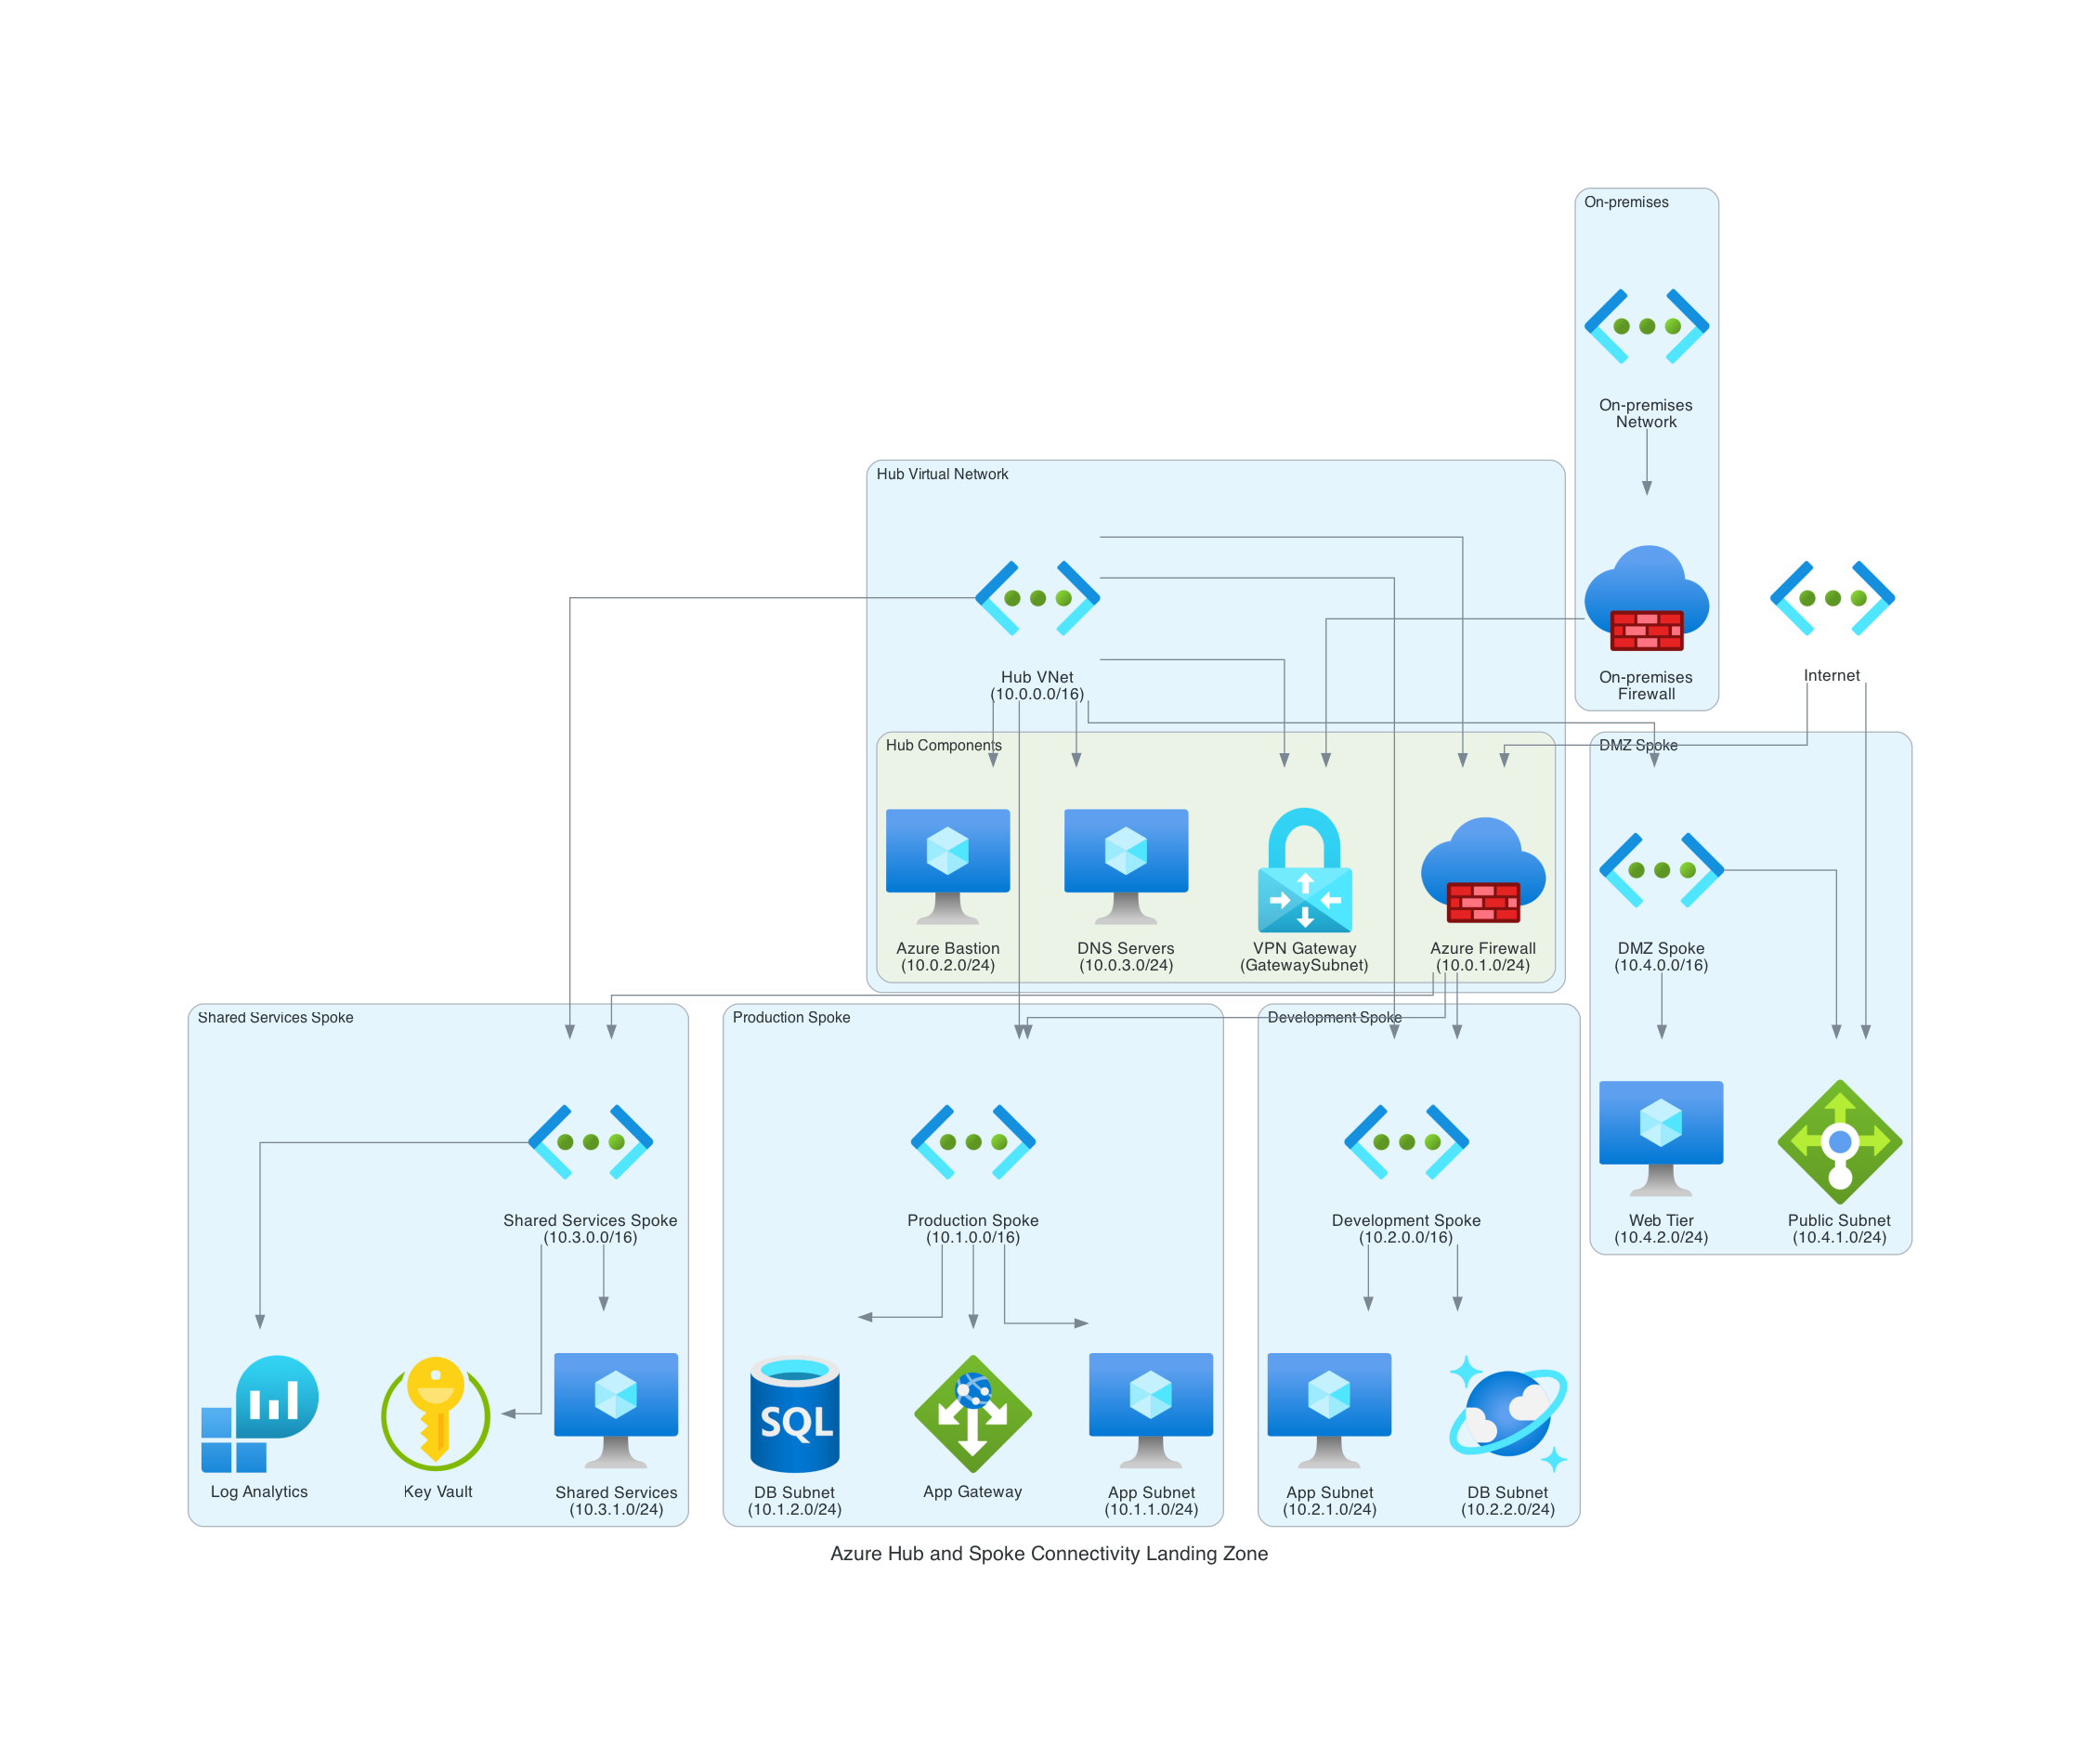

In [3]:
# Azure Hub and Spoke Connectivity Landing Zone Architecture
with Diagram("Azure Hub and Spoke Connectivity Landing Zone", 
            show=False, 
            direction="TB",
            filename="azure_hub_spoke_connectivity",
            graph_attr={"fontsize": "16", "bgcolor": "white"}):
    
    # Hub Virtual Network (중앙 허브)
    with Cluster("Hub Virtual Network"):
        hub_vnet = VirtualNetworks("Hub VNet\n(10.0.0.0/16)")
        
        # Hub 내부 구성요소들
        with Cluster("Hub Components"):
            azure_firewall = Firewall("Azure Firewall\n(10.0.1.0/24)")
            vpn_gateway = VirtualNetworkGateways("VPN Gateway\n(GatewaySubnet)")
            bastion = VM("Azure Bastion\n(10.0.2.0/24)")
            dns_servers = VM("DNS Servers\n(10.0.3.0/24)")
    
    # On-premises 연결
    with Cluster("On-premises"):
        onprem_network = VirtualNetworks("On-premises\nNetwork")
        onprem_firewall = Firewall("On-premises\nFirewall")
    
    # Spoke Virtual Networks
    with Cluster("Production Spoke"):
        prod_spoke = VirtualNetworks("Production Spoke\n(10.1.0.0/16)")
        prod_subnet = VM("App Subnet\n(10.1.1.0/24)")
        prod_db_subnet = SQLDatabases("DB Subnet\n(10.1.2.0/24)")
        prod_gateway = ApplicationGateway("App Gateway")
    
    with Cluster("Development Spoke"):
        dev_spoke = VirtualNetworks("Development Spoke\n(10.2.0.0/16)")
        dev_subnet = VM("App Subnet\n(10.2.1.0/24)")
        dev_db_subnet = CosmosDb("DB Subnet\n(10.2.2.0/24)")
    
    with Cluster("Shared Services Spoke"):
        shared_spoke = VirtualNetworks("Shared Services Spoke\n(10.3.0.0/16)")
        shared_services = VM("Shared Services\n(10.3.1.0/24)")
        log_analytics = LogAnalyticsWorkspaces("Log Analytics")
        key_vault = KeyVaults("Key Vault")
    
    with Cluster("DMZ Spoke"):
        dmz_spoke = VirtualNetworks("DMZ Spoke\n(10.4.0.0/16)")
        public_subnet = LoadBalancers("Public Subnet\n(10.4.1.0/24)")
        web_tier = VM("Web Tier\n(10.4.2.0/24)")
    
    # Internet Gateway
    internet = VirtualNetworks("Internet")
    
    # 연결 관계 정의
    # Hub-Spoke 피어링 연결 (양방향)
    hub_vnet >> prod_spoke
    hub_vnet >> dev_spoke  
    hub_vnet >> shared_spoke
    hub_vnet >> dmz_spoke
    
    # Hub 내부 연결
    hub_vnet >> [azure_firewall, vpn_gateway, bastion, dns_servers]
    
    # On-premises 연결
    onprem_network >> onprem_firewall >> vpn_gateway
    
    # Internet 연결
    internet >> azure_firewall
    internet >> public_subnet
    
    # Spoke 내부 연결
    prod_spoke >> [prod_subnet, prod_db_subnet, prod_gateway]
    dev_spoke >> [dev_subnet, dev_db_subnet]
    shared_spoke >> [shared_services, log_analytics, key_vault]
    dmz_spoke >> [public_subnet, web_tier]
    
    # Traffic flow through firewall
    azure_firewall >> [prod_spoke, dev_spoke, shared_spoke]

print("✅ Azure Hub and Spoke Connectivity Landing Zone 다이어그램이 생성되었습니다!")
print("📁 파일명: azure_hub_spoke_connectivity.png")

# 파일 생성 확인 및 표시
hub_spoke_img = "azure_hub_spoke_connectivity.png"
if os.path.exists(hub_spoke_img):
    print("📊 Hub and Spoke 다이어그램이 성공적으로 생성되었습니다!")
    hub_spoke_size = os.path.getsize(hub_spoke_img)
    print(f"📏 파일 크기: {hub_spoke_size} bytes")
    display(Image(filename=hub_spoke_img))
else:
    print(f"❌ 파일 생성 실패: {hub_spoke_img}")